# Hoja de Trabajo 7

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Read the CSV files
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Display the dataframe
print("DataFrame for train.csv")
print(df_test.head())
print("\nDataFrame for test.csv")
print(df_train.head())


DataFrame for train.csv
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCond

## Examinar DataFrames

In [3]:
# Display the colums of the dataframes
print("\nColumns for train.csv")
print(df_test.columns)
print("\nColumns for test.csv")
print(df_train.columns)


Columns for train.csv
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G

In [4]:
# Display the shape of the dataframe
print("\nShape of DataFrame for train.csv")
print(df_test.shape)
print("\nShape of DataFrame for test.csv")
print(df_train.shape)


Shape of DataFrame for train.csv
(1459, 80)

Shape of DataFrame for test.csv
(1460, 81)


In [5]:
# Explorar los datos
print("Información de df_train:")
print(df_train.info())
print("Estadísticas de df_train:")
print(df_train.describe())

print("Información de df_test:")
print(df_test.info())
print("Estadísticas de df_test:")
print(df_test.describe())

Información de df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

### Valores Nulos

In [6]:
df_test.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Eliminar valores nulos y reemplazarlos con float
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)


Para realizar correctamente los SVM, se requiere que ambos datasets (train y test), no tengan valores nulos.

### Encoding

Para realizar un encoding bueno, se requiere de evaluar y analizar las variables categoricas dentro del dataset;

`MSZoning`
`Street`
`Alley`
`LotShape`
`LandContour`
`Utilities`
`LotConfig`
`LandSlope`
`Neighborhood`
`Condition1`
`Condition2`
`BldgType`
`HouseStyle`
`RoofStyle`
`RoofMatl`
`Exterior1st`
`Exterior2nd`
`MasVnrType`
`ExterQual`
`ExterCond`
`Foundation`
`BsmtQual`
`BsmtCond`
`BsmtExposure`
`BsmtFinType1`
`BsmtFinType2`
`Heating`
`HeatingQC`
`CentralAir`
`Electrical`
`KitchenQual`
`Functional`
`FireplaceQu`
`GarageType`
`GarageFinish`
`GarageQual`
`GarageCond`
`PavedDrive`
`PoolQC`
`Fence`
`MiscFeature`
`SaleType`
`SaleCondition`

In [10]:
# Ver valores unicas de las columnas categoricas
print("Valores unicos de la columna MSZoning:")
print(df_train['MSZoning'].unique())

print("Valores unicos de la columna Street:")
print(df_train['Street'].unique())

print("Valores unicos de la columna LotShape:")
print(df_train['LotShape'].unique())

print("Valores unicos de la columna LandContour:")
print(df_train['LandContour'].unique())

print("Valores unicos de la columna Utilities:")
print(df_train['Utilities'].unique())

print("Valores unicos de la columna LotConfig:")
print(df_train['LotConfig'].unique())

print("Valores unicos de la columna LandSlope:")
print(df_train['LandSlope'].unique())

print("Valores unicos de la columna Neighborhood:")
print(df_train['Neighborhood'].unique())

print("Valores unicos de la columna Condition1:")
print(df_train['Condition1'].unique())

print("Valores unicos de la columna Condition2:")
print(df_train['Condition2'].unique())

print("Valores unicos de la columna BldgType:")
print(df_train['BldgType'].unique())

print("Valores unicos de la columna HouseStyle:")
print(df_train['HouseStyle'].unique())

print("Valores unicos de la columna RoofStyle:")
print(df_train['RoofStyle'].unique())

print("Valores unicos de la columna RoofMatl:")
print(df_train['RoofMatl'].unique())

print("Valores unicos de la columna Exterior1st:")
print(df_train['Exterior1st'].unique())

print("Valores unicos de la columna Exterior2nd:")
print(df_train['Exterior2nd'].unique())

print("Valores unicos de la columna MasVnrType:")
print(df_train['MasVnrType'].unique())

print("Valores unicos de la columna ExterQual:")
print(df_train['ExterQual'].unique())

print("Valores unicos de la columna ExterCond:")
print(df_train['ExterCond'].unique())

print("Valores unicos de la columna Foundation:")
print(df_train['Foundation'].unique())

print("Valores unicos de la columna BsmtQual:")
print(df_train['BsmtQual'].unique())

print("Valores unicos de la columna BsmtCond:")
print(df_train['BsmtCond'].unique())

print("Valores unicos de la columna BsmtExposure:")
print(df_train['BsmtExposure'].unique())

print("Valores unicos de la columna BsmtFinType1:")
print(df_train['BsmtFinType1'].unique())

print("Valores unicos de la columna BsmtFinType2:")
print(df_train['BsmtFinType2'].unique())

print("Valores unicos de la columna Heating:")
print(df_train['Heating'].unique())

print("Valores unicos de la columna HeatingQC:")
print(df_train['HeatingQC'].unique())

print("Valores unicos de la columna CentralAir:")
print(df_train['CentralAir'].unique())

print("Valores unicos de la columna Electrical:")
print(df_train['Electrical'].unique())

print("Valores unicos de la columna KitchenQual:")
print(df_train['KitchenQual'].unique())

print("Valores unicos de la columna Functional:")
print(df_train['Functional'].unique())

print("Valores unicos de la columna FireplaceQu:")
print(df_train['FireplaceQu'].unique())

print("Valores unicos de la columna GarageType:")
print(df_train['GarageType'].unique())

print("Valores unicos de la columna GarageFinish:")
print(df_train['GarageFinish'].unique())

print("Valores unicos de la columna GarageQual:")
print(df_train['GarageQual'].unique())

print("Valores unicos de la columna GarageCond:")
print(df_train['GarageCond'].unique())

print("Valores unicos de la columna PavedDrive:")
print(df_train['PavedDrive'].unique())

print("Valores unicos de la columna PoolQC:")
print(df_train['PoolQC'].unique())

print("Valores unicos de la columna Fence:")
print(df_train['Fence'].unique())

print("Valores unicos de la columna MiscFeature:")
print(df_train['MiscFeature'].unique())

print("Valores unicos de la columna SaleType:")
print(df_train['SaleType'].unique())

print("Valores unicos de la columna SaleCondition:")
print(df_train['SaleCondition'].unique())


Valores unicos de la columna MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
Valores unicos de la columna Street:
['Pave' 'Grvl']
Valores unicos de la columna LotShape:
['Reg' 'IR1' 'IR2' 'IR3']
Valores unicos de la columna LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']
Valores unicos de la columna Utilities:
['AllPub' 'NoSeWa']
Valores unicos de la columna LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Valores unicos de la columna LandSlope:
['Gtl' 'Mod' 'Sev']
Valores unicos de la columna Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Valores unicos de la columna Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Valores unicos de la columna Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Valores unicos de la columna BldgType:
['

In [11]:
# Codificar las columnas categoricas

# Seleccionar las columnas categóricas
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Aplicar codificación one-hot en df_train
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)

# Aplicar codificación one-hot en df_test
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

In [12]:
df_train_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [13]:
df_test_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


### SVM

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Suponiendo que la variable respuesta es 'PriceCategory'
y_train = df_train['SalePrice']
X_train = df_train_encoded.drop('SalePrice', axis=1)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Lista para almacenar los modelos entrenados
svm_models = []

# Configuración de diferentes kernels y valores de parámetros
kernels_params = [
    {'kernel': 'linear', 'C': 1.0},
    {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},
    {'kernel': 'poly', 'C': 1.0, 'degree': 3},
    # Agregar más configuraciones de kernel y parámetros aquí si es necesario
]

# Entrenar modelos para cada configuración
for params in kernels_params:
    # Crear y entrenar el modelo SVM
    svm_model = SVC(**params)
    svm_model.fit(X_train_split, y_train_split)
    svm_models.append(svm_model)

# Evaluación de los modelos en el conjunto de validación
for i, model in enumerate(svm_models):
    y_pred = model.predict(X_val_split)
    print(f"Modelo {i+1} - Configuración: {model.kernel}, Parámetros: {model.get_params()}")
    print(classification_report(y_val_split, y_pred))


Modelo 1 - Configuración: linear, Parámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.0

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Modelo 2 - Configuración: rbf, Parámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00     

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Modelo 3 - Configuración: poly, Parámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00   

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### Matriz de Confusion

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Lista para almacenar los resultados de cada modelo
results = []

# Iterar sobre los modelos y entrenar/evaluar cada uno
for i, model in enumerate(svm_models):
    # Entrenar y evaluar el modelo
    confusion, report = train_and_evaluate_svm(model, X_train_split, y_train_split, X_val_split, y_val_split)
    
    # Imprimir los resultados
    print(f"Modelo {i+1} - Configuración: {model.kernel}, Parámetros: {model.get_params()}")
    print("Matriz de Confusión:")
    print(confusion)
    print("Reporte de Clasificación:")
    print(report)
    print("---------------------------------------")
    
    # Guardar los resultados para comparación
    results.append((f"Modelo {i+1}", confusion, report))

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Modelo 1 - Configuración: linear, Parámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500     

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Modelo 2 - Configuración: rbf, Parámetros: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Observando los resultados con los modelos de SVM parece que todos los modelos tienen un rendimiento muy bajo, con una precisión, recall y puntuación F1 cercanas a cero en la mayoría de las clases.

Las matrices de confusión también reflejan este bajo rendimiento, con la mayoría de las predicciones concentradas en una clase o distribuidas uniformemente entre las clases.

Dado este rendimiento deficiente, sería importante revisar la configuración de los modelos SVM, como los hiperparámetros y el preprocesamiento de datos, para mejorar su capacidad predictiva. Además, considerar otras técnicas de modelado y evaluación puede ser beneficioso para obtener mejores resultados.

### Otro modelo de Clasificación (Random Forest)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Evaluación del modelo en el conjunto de validación
y_pred_rf = rf_model.predict(X_val_split)

# Imprimir el reporte de clasificación
print("Modelo de Random Forest:")
print(classification_report(y_val_split, y_pred_rf))

# Comparar con los modelos SVM
for i, model in enumerate(svm_models):
    print(f"Modelo SVM {i+1} - Configuración: {model.kernel}, Parámetros: {model.get_params()}")
    print(classification_report(y_val_split, model.predict(X_val_split)))
    print("---------------------------------------")


Modelo de Random Forest:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76500       0.00      0.00      0.00         0
       78000       0.00      0.00      0.00         0
       79500       0.00      0.00      0.00         1
  

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         0
       80000       0.00      0.00      0.00         0
       81000       0.00    

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       81000       0.00      0.00      0.00         1
       84500       0.00      0.00      0.00         1
       84900       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00         1
       86000       0.00      0.00      0.00         2
       89471       0.00    

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### Otro modelo de clasificacion (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Definir el modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Define el número de vecinos

# Entrenar el modelo k-NN
knn_model.fit(X_train_split, y_train_split)

# Predecir en el conjunto de validación
y_pred = knn_model.predict(X_val_split)

# Evaluación del modelo
print(classification_report(y_val_split, y_pred))


              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         0
       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       62383       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         0
       73000       0.00      0.00      0.00         0
       75000       0.00    

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### Otro modelo de clasificacion (Arboles de Decision)

Reporte de clasificación del árbol de decisión:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         0
       78000       0.00      0.00      0.00         0
       79500       0.00      0.00

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

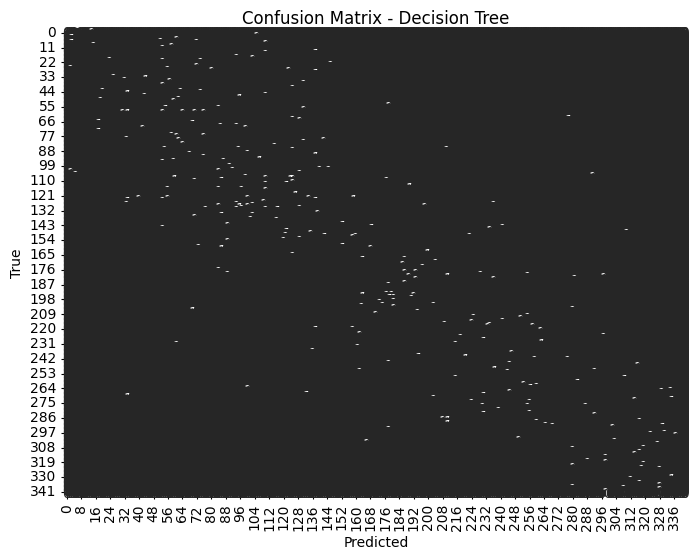

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train_split, y_train_split)

# Predecir en el conjunto de validación
y_pred_tree = tree_model.predict(X_val_split)

# Imprimir el reporte de clasificación
print("Reporte de clasificación del árbol de decisión:")
print(classification_report(y_val_split, y_pred_tree))



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

# Obtener el mejor modelo y sus hiperparámetros
best_decision_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(best_params)

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_decision_tree.fit(X_train_split, y_train_split)

# Hacer predicciones en el conjunto de validación
y_pred = best_decision_tree.predict(X_val_split)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación del Árbol de Decisión:")
print(classification_report(y_val_split, y_pred))


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores hiperparámetros:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Reporte de Clasificación del Árbol de Decisión:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         0
       79500       0.00 

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base